# Dalitz Viewer

## Overview

This tool visualises the interference effect of resonances within a Dalitz plot.
The code foresees the decay of a spin-0 particle into three spin-0 particles.
Two of the three particles can form resonances, which can have spins can be between 0 and 2.
It is set up to visualise up to two resonances for each of the three possible invariant mass pairs.
The resonances are displayed as simplified Breit-Wigner functions (without barrier factor and running width).

## Instructions

The code is split in six cells, which should be executed separately. 

### Execution
After launching the notebook, please:
- Restart the kernel (Kernel > Restart or via the button with the circular arrow)
- Run one cell at a time (when the cell is active press ctrl+return or press the "Run" button)

### The six cells
The six cells of code provide the following functionality
1. Display a Dalitz plot with six resonances
2. Display the corresponding anti-meson Dalitz plot (only the resonance amplitudes and phases can be altered)
3. Display the asymmetry in amplitude and phase of the two Dalitz plots above
4. Display the projections of the first Dalitz plot onto the three possible invariant mass pairs
5. Display the first Dalitz plot with a logarithmic density scale to illustrate better areas of low density
6. Illustrate how the complex amplitudes of different resonances add up at a particular point within the Dalitz plot.

## The meson Dalitz plot

In [30]:
##### Dalitz GUI (no barrier factor)(and more brief)
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import cmath
import scipy.integrate
import matplotlib
%matplotlib inline

### define display pixels
npoints = 200 ### resolution of plot
arr = np.linspace(0, 1, npoints, endpoint=False)
dist_prob = np.zeros([npoints,npoints])
dist_phase = np.zeros([npoints,npoints])
dist_amplitude = np.zeros([npoints,npoints],dtype=complex)
dist_a1 = np.zeros([npoints,npoints],dtype=complex)
dist_ax = np.zeros([npoints,npoints],dtype=complex)
dist_ay = np.zeros([npoints,npoints],dtype=complex)
dist_az = np.zeros([npoints,npoints],dtype=complex)

### my colormaps
my_cmap1 = matplotlib.cm.get_cmap('gnuplot')
my_cmap1.set_under('w')
my_cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["yellow","green","royalblue","red","yellow"])
my_cmap2.set_under('w')
clnorm1=colors.LogNorm(vmin=0.01, vmax=1)
clnorm2 = plt.Normalize(-180,180)
clnorm3 = plt.Normalize(-1,1)

### other useful global variables
Msq, m1sq,m2sq,m3sq = 1. ,1.,1.,1.
margin = 1.
xmin = 1.
ymin = 1.
side = 1.
cyupp = np.zeros(npoints)
cylow = np.zeros(npoints)
Proba = 0.
msum = 0.

### from normalized array index to axis value
def nindex2value(i,side,vmin,margin):
    return i*side+vmin-margin
### from axis value to array index
def value2index(v,margin,vmin,side):
    index = np.float((v+margin-vmin)*npoints/side)
    return round(index)

### angular distribution only
def other_dist_x(spin,x,y,z,mr):
    if spin==0:
        return 1
    global Msq,m1sq,m2sq,m3sq
    if spin==1:
        Zemach1 = z-y-(Msq-m3sq)*(m1sq-m2sq)/x
        return Zemach1
    elif spin==2:
        Zemach2 = (z-y-(Msq-m3sq)*(m1sq-m2sq)/x)**2-(x-2*(Msq+m3sq)+(Msq-m3sq)**2/x)*(x-2*(m1sq+m2sq)+(m1sq-m2sq)**2/x)/3
        return Zemach2
    
def other_dist_y(spin,x,y,z,mr):
    if spin==0:
        return 1
    global Msq,m1sq,m2sq,m3sq
    if spin==1:
        Zemach1 = x-z-(Msq-m1sq)*(m2sq-m3sq)/y
        return Zemach1
    elif spin==2:
        Zemach2 = (x-z-(Msq-m1sq)*(m2sq-m3sq)/y)**2-(y-2*(Msq+m1sq)+(Msq-m1sq)**2/y)*(y-2*(m3sq+m2sq)+(m3sq-m2sq)**2/y)/3
        return Zemach2
    
def other_dist_z(spin,x,y,z,mr):
    if spin==0:
        return 1
    global Msq,m1sq,m2sq,m3sq
    if spin==1:
        Zemach1 = y-x-(Msq-m2sq)*(m3sq-m1sq)/z
        return Zemach1
    elif spin==2:
        Zemach2 = (y-x-(Msq-m2sq)*(m3sq-m1sq)/z)**2-(z-2*(Msq+m2sq)+(Msq-m2sq)**2/z)*(z-2*(m1sq+m3sq)+(m1sq-m3sq)**2/z)/3
        return Zemach2
    
### density over Dalitz plot (probability and phase angle)
def density(y,x,Dx1,Dy1,Dx2,Dy2,Ax1,Ay1,Ax2,Ay2,Dz1,Dz2,Az1,Az2):
    global msum
    z = msum-x-y
    global Proba
    elem_side = side/npoints
    m = value2index(x,margin,xmin,side)
    n = value2index(y,margin,ymin,side)
    ### complex amplitude of x-resonance (which have certain x-value)
    Mx1 = mx1.value
    Wx1 = wx1.value
    Apd_x = -cmath.rect(Ax1,Dx1*np.pi/180)/(x-Mx1**2+complex(0,Mx1*Wx1))*other_dist_x(sx1.value,x,y,z,Mx1)
    ### add another x-resonance (if the amplitude is big enough)
    if(Ax2>1e-9):
        Mx2 = mx2.value
        Wx2 = wx2.value
        Apd_x -= cmath.rect(Ax2,Dx2*np.pi/180)/(x-Mx2**2+complex(0,Mx2*Wx2))*other_dist_x(sx2.value,x,y,z,Mx2)
    ### complex amplitude of y-resonance (which have certain y-value)
    My1 = my1.value
    Wy1 = wy1.value
    Apd_y = -cmath.rect(Ay1,Dy1*np.pi/180)/(y-My1**2+complex(0,My1*Wy1))*other_dist_y(sy1.value,x,y,z,My1)
    ### add another y-resonance (if the amplitude is big enough)
    if(Ay2>1e-9):
        My2 = my2.value
        Wy2 = wy2.value
        Apd_y -= cmath.rect(Ay2,Dy2*np.pi/180)/(y-My2**2+complex(0,My2*Wy2))*other_dist_y(sy2.value,x,y,z,My2)

    # the diagonal
    Apd_z = 0
    if(Az1>1e-9):
        Mz1 = mz1.value
        Wz1 = wz1.value
        Apd_z = -cmath.rect(Az1,Dz1*np.pi/180)/(z-Mz1**2+complex(0,Mz1*Wz1))*other_dist_z(sz1.value,x,y,z,Mz1)
    if(Az2>1e-9):
        Mz2 = mz2.value
        Wz2 = wz2.value
        Apd_z -= cmath.rect(Az2,Dz2*np.pi/180)/(z-Mz2**2+complex(0,Mz2*Wz2))*other_dist_z(sz2.value,x,y,z,Mz2)

    ### the total complex amplitude
    Apd_tot = cmath.rect(a_non.value,d_non.value*np.pi/180)+Apd_x+Apd_y+Apd_z
    ### the probability and the phase (DEG: -180~180)
    prob = abs(Apd_tot)**2
    phase = cmath.phase(Apd_tot)*180/np.pi
    Proba+=prob
    
    return prob,phase,Apd_tot,cmath.rect(a_non.value,d_non.value*np.pi/180),Apd_x,Apd_y,Apd_z

### update plot function
def update_plot(M,m1,m2,m3, sx1,mx1,wx1,dx1,ax1,
                            sy1,my1,wy1,dy1,ay1,
                            sz1,mz1,wz1,dz1,az1,
                            sx2,mx2,wx2,dx2,ax2,
                            sy2,my2,wy2,dy2,ay2,
                            sz2,mz2,wz2,dz2,az2,dnon,anon):
    global Proba; Proba = 0.
    
    ### define the useful intermediate variables
    global Msq,m1sq,m2sq,m3sq
    Msq = M*M
    m1sq,m2sq,m3sq = m1*m1,m2*m2,m3*m3
    E2star = np.zeros(npoints)
    E3star = np.zeros(npoints)
    term1 = np.zeros(npoints)
    term2 = np.zeros(npoints)
    term3 = np.zeros(npoints)
    global xmin; xmin = (m1+m2)**2
    xmax = (M-m3)**2
    global ymin; ymin = (m2+m3)**2
    ymax = (M-m1)**2
    zmin = (m1+m3)**2
    zmax = (M-m2)**2
    global msum
    msum = Msq+m1sq+m2sq+m3sq
    cmax = msum-zmin
    cmin = msum-zmax
    global side; side = 1.2*max(ymax-ymin,xmax-xmin) # decide boundary of the figure
    global margin; margin = side/12 # 0.1*max(ymax-ymin,xmax-xmin)
    global cyupp; cyupp = np.zeros(npoints)
    global cylow; cylow = np.zeros(npoints)
    ### arraies scaled to axis values in store of the data for display
    cx = np.array([nindex2value(i,side,xmin,margin) for i in arr])
    cy = np.array([nindex2value(i,side,ymin,margin) for i in arr])
    ### obtain the boundary of Dalitz plot
    for m in range(npoints):
        if cx[m]>xmin and cx[m]<xmax:
            E2star[m] = (cx[m]-m1sq+m2sq)/np.sqrt(cx[m])/2
            E3star[m] = (Msq-cx[m]-m3sq)/np.sqrt(cx[m])/2
            term1[m] = (E2star[m]+E3star[m])**2
            term2[m] = np.sqrt(E2star[m]**2-m2sq)
            term3[m] = np.sqrt(E3star[m]**2-m3sq)
            cyupp[m] = term1[m]-(term2[m]-term3[m])**2
            cylow[m] = term1[m]-(term2[m]+term3[m])**2
    
    ### obtain the values inside Dalitz plot
    for m in range(npoints):
        for n in range(npoints):
            if (cy[n]<cyupp[m]) and (cy[n]>cylow[m]): ### calculate the probability and the phase inside the boundary
                dist = density(cy[n],cx[m],dx1,dy1,dx2,dy2,ax1,ay1,ax2,ay2,dz1,dz2,az1,az2)
                dist_prob[n,m] = dist[0]
                dist_phase[n,m] = dist[1]
                dist_amplitude[n,m] = dist[2]
                dist_a1[n,m] = dist[3]
                dist_ax[n,m] = dist[4]
                dist_ay[n,m] = dist[5]
                dist_az[n,m] = dist[6]
            else: ### assign certain values outside the boundary (so as to plot them as blank)
                dist_prob[n,m] = -10
                dist_phase[n,m] = -400
    
    ### using Proba to normailize            
    Proba = npoints**2/Proba ### so that in average there should be one event in every element square 
    for m in range(npoints):
        for n in range(npoints):
            if (cy[n]<cyupp[m]) and (cy[n]>cylow[m]): 
                dist_prob[n,m]*=Proba       
                #dist_amplitude[n,m]*=np.sqrt(Proba) # in order to speed up a little
                #dist_a1[n,m]*=np.sqrt(Proba)
                #dist_ax[n,m]*=np.sqrt(Proba)
                #dist_ay[n,m]*=np.sqrt(Proba)
           
    ### define plot
    fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,6))
    axis1.set_title('Dalitz plot (Probability)')
    im1 = axis1.imshow(dist_prob,origin='lower',extent=[xmin-margin,xmin-margin+side,ymin-margin,ymin-margin+side],cmap=my_cmap1,vmin=0)
    axis1.set_xlabel('$m_{12}^2(GeV^2)$')
    axis1.set_ylabel('$m_{23}^2(GeV^2)$')
    fig.colorbar(im1,ax=axis1)
    axis2.set_title('Dalitz plot (Phase)')
    im2 = axis2.imshow(dist_phase,origin='lower',extent=[xmin-margin,xmin-margin+side,ymin-margin,ymin-margin+side],cmap=my_cmap2,norm=clnorm2,vmin=-190)
    axis2.set_xlabel('$m_{12}^2(GeV^2)$')
    axis2.set_ylabel('$m_{23}^2(GeV^2)$')
    fig.colorbar(im2,ax=axis2)
    plt.show()
    
    ### warning message
    if m1+m2+m3>=M:
        print("***** WARNING: m1+m2+m3>M! Please re-adjust the variables.")
    elif mx1**2<xmin or mx1**2>xmax:
        print("**** WARNING: resonance_x1 out of its physical range. Please re-adjust the variables.")
    elif my1**2<ymin or my1**2>ymax:
        print("**** WARNING: resonance_y1 out of its physical range. Please re-adjust the variables.")
    elif az1>1e-9 and (mz1**2<zmin or mz1**2>zmax):
        print("*** WARNING: resonance_z1 out of its physical range. Please re-adjust the variables.")
    elif ax2>1e-9 and (mx2**2<xmin or mx2**2>xmax):
        print("*** WARNING: resonance_x2 out of its physical range. Please re-adjust the variables.")
    elif ay2>1e-9 and (my2**2<ymin or my2**2>ymax):
        print("*** WARNING: resonance_y2 out of its physical range. Please re-adjust the variables.")
    elif az2>1e-9 and (mz2**2<zmin or mz2**2>zmax):
        print("*** WARNING: resonance_z2 out of its physical range. Please re-adjust the variables.")

### define widgets (determining the boundary of the Dalitz)
M = widgets.FloatSlider(min=1.86, max=5.36, value=1.865, step=0.01, description='$M$:',continuous_update=False)
m1 = widgets.FloatSlider(min=0.001, max=1.86, value=0.140, step=0.01, description='$m_{1}$:',continuous_update=False)
m2 = widgets.FloatSlider(min=0.001, max=1.86, value=0.135, step=0.01, description='$m_{2}$:',continuous_update=False)
m3 = widgets.FloatSlider(min=0.001, max=1.86, value=0.140, step=0.01, description='$m_{3}$:',continuous_update=False)
label1 = widgets.Label("Non-resonant amplitude:",layout=widgets.Layout(width='15%'))
a_non = widgets.FloatLogSlider(min=-10, max=10, value=0.092, description='$|Amp_{n}|$:',layout=widgets.Layout(width='25%'),continuous_update=False)
d_non = widgets.FloatSlider(min=-180, max=180, value=-11, description='$\delta_{n}$:',layout=widgets.Layout(width='25%'),continuous_update=False)

### widgets for parameters of resonances
sliderW = '25%'
sx1 = widgets.Dropdown(options=[0,1,2],value=1,description='$spin_{x1}$:',layout=widgets.Layout(width='10%'))
mx1 = widgets.FloatSlider(min=0, max=3.5, value=0.775, description='$mass_{x1}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
wx1 = widgets.FloatLogSlider(min=-10, max=0, value=0.149, description='$width_{x1}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
dx1 = widgets.FloatSlider(min=-180, max=180, value=0, description='$\delta_{x1}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
ax1 = widgets.FloatLogSlider(min=-10, max=10, value=0.823, description='$|Amp_{x1}|$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
sy1 = widgets.Dropdown(options=[0,1,2],value=1,description='$spin_{y1}$:',layout=widgets.Layout(width='10%'))
my1 = widgets.FloatSlider(min=0, max=3.5, value=0.775, description='$mass_{y1}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
wy1 = widgets.FloatLogSlider(min=-10, max=0, value=0.149, description='$width_{y1}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
dy1 = widgets.FloatSlider(min=-180, max=180, value=-2, description='$\delta_{y1}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
ay1 = widgets.FloatLogSlider(min=-10, max=10, value=0.588, description='$|Amp_{y1}|$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
sz1 = widgets.Dropdown(options=[0,1,2],value=1,description='$spin_{z1}$:',layout=widgets.Layout(width='10%'))
mz1 = widgets.FloatSlider(min=0, max=3.5, value=0.775, description='$mass_{z1}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
wz1 = widgets.FloatLogSlider(min=-10, max=0, value=0.149, description='$width_{z1}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
dz1 = widgets.FloatSlider(min=-180, max=180, value=16.2, description='$\delta_{z1}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
az1 = widgets.FloatLogSlider(min=-10, max=10, value=0.512, description='$|Amp_{z1}|$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
### widgets for parameters of another pair of resonances
sx2 = widgets.Dropdown(options=[0,1,2],value=0,description='$spin_{x2}$:',layout=widgets.Layout(width='10%'))
mx2 = widgets.FloatSlider(min=0, max=3.5, value=0, description='$mass_{x2}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
wx2 = widgets.FloatLogSlider(min=-10, max=0, value=1, description='$width_{x2}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
dx2 = widgets.FloatSlider(min=-180, max=180, value=0, description='$\delta_{x2}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
ax2 = widgets.FloatLogSlider(min=-10, max=10, value=0, description='$|Amp_{x2}|$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
sy2 = widgets.Dropdown(options=[0,1,2],value=0,description='$spin_{y2}$:',layout=widgets.Layout(width='10%'))
my2 = widgets.FloatSlider(min=0, max=3.5, value=0, description='$mass_{y2}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
wy2 = widgets.FloatLogSlider(min=-10, max=0, value=1, description='$width_{y2}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
dy2 = widgets.FloatSlider(min=-180, max=180, value=0, description='$\delta_{y2}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
ay2 = widgets.FloatLogSlider(min=-10, max=10, value=0, description='$|Amp_{y2}|$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
sz2 = widgets.Dropdown(options=[0,1,2],value=0,description='$spin_{z2}$:',layout=widgets.Layout(width='10%'))
mz2 = widgets.FloatSlider(min=0, max=3.5, value=0, description='$mass_{z2}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
wz2 = widgets.FloatLogSlider(min=-10, max=0, value=1, description='$width_{z2}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
dz2 = widgets.FloatSlider(min=-180, max=180, value=0, description='$\delta_{z2}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
az2 = widgets.FloatLogSlider(min=-10, max=10, value=0, description='$|Amp_{z2}|$:',layout=widgets.Layout(width=sliderW),continuous_update=False)

### layout of the widgets
line1 = widgets.HBox([M,label1,a_non,d_non])
line2 = widgets.HBox([m1,m2,m3])
line3 = widgets.HBox([sx1,mx1,wx1,ax1,dx1])
line4 = widgets.HBox([sy1,my1,wy1,ay1,dy1])
line5 = widgets.HBox([sz1,mz1,wz1,az1,dz1])
line6 = widgets.HBox([sx2,mx2,wx2,ax2,dx2])
line7 = widgets.HBox([sy2,my2,wy2,ay2,dy2])
line8 = widgets.HBox([sz2,mz2,wz2,az2,dz2])
ui = widgets.VBox([line1,line2,line3,line4,line5,line6,line7,line8])

### display the widgets
kwargs = {'M':M,'m1':m1,'m2':m2,'m3':m3,'dnon':d_non,'anon':a_non,
          'sx1':sx1,'mx1':mx1,'wx1':wx1,'dx1':dx1,'ax1':ax1,
          'sy1':sy1,'my1':my1,'wy1':wy1,'dy1':dy1,'ay1':ay1,
          'sz1':sz1,'mz1':mz1,'wz1':wz1,'dz1':dz1,'az1':az1,
          'sx2':sx2,'mx2':mx2,'wx2':wx2,'dx2':dx2,'ax2':ax2,
          'sy2':sy2,'my2':my2,'wy2':wy2,'dy2':dy2,'ay2':ay2,
          'sz2':sz2,'mz2':mz2,'wz2':wz2,'dz2':dz2,'az2':az2}
out = widgets.interactive_output(update_plot, kwargs)
display(out,ui)

Output()

## The anti-meson Dalitz plot

In [31]:

dist_prob_bar = np.zeros([npoints,npoints])
dist_phase_bar = np.zeros([npoints,npoints])
dist_amplitude_bar = np.zeros([npoints,npoints],dtype=complex)
dist_a1_bar = np.zeros([npoints,npoints],dtype=complex)
dist_ax_bar = np.zeros([npoints,npoints],dtype=complex)
dist_ay_bar = np.zeros([npoints,npoints],dtype=complex)
dist_az_bar = np.zeros([npoints,npoints],dtype=complex)

### update plot function (The only difference are: add "bar" behind every "dist_*", and change the default dist_phase_bar to -800)
def update_plot_bar(M,m1,m2,m3, sx1,mx1,wx1,dx1,ax1,
                            sy1,my1,wy1,dy1,ay1,
                            sz1,mz1,wz1,dz1,az1,
                            sx2,mx2,wx2,dx2,ax2,
                            sy2,my2,wy2,dy2,ay2,
                            sz2,mz2,wz2,dz2,az2,dnon,anon):
    global Proba; Proba = 0.
    
    
    
    ### define the useful intermediate variables
    global Msq,m1sq,m2sq,m3sq
    Msq = M*M
    m1sq,m2sq,m3sq = m1*m1,m2*m2,m3*m3
    E2star = np.zeros(npoints)
    E3star = np.zeros(npoints)
    term1 = np.zeros(npoints)
    term2 = np.zeros(npoints)
    term3 = np.zeros(npoints)
    global xmin; xmin = (m1+m2)**2
    xmax = (M-m3)**2
    global ymin; ymin = (m2+m3)**2
    ymax = (M-m1)**2
    zmin = (m1+m3)**2
    zmax = (M-m2)**2
    global msum
    msum = Msq+m1sq+m2sq+m3sq
    cmax = msum-zmin
    cmin = msum-zmax
    global side; side = 1.2*max(ymax-ymin,xmax-xmin) # decide boundary of the figure
    global margin; margin = side/12 # 0.1*max(ymax-ymin,xmax-xmin)
    global cyupp; cyupp = np.zeros(npoints)
    global cylow; cylow = np.zeros(npoints)
    ### arraies scaled to axis values in store of the data for display
    cx = np.array([nindex2value(i,side,xmin,margin) for i in arr])
    cy = np.array([nindex2value(i,side,ymin,margin) for i in arr])
    ### obtain the boundary of Dalitz plot
    for m in range(npoints):
        if cx[m]>xmin and cx[m]<xmax:
            E2star[m] = (cx[m]-m1sq+m2sq)/np.sqrt(cx[m])/2
            E3star[m] = (Msq-cx[m]-m3sq)/np.sqrt(cx[m])/2
            term1[m] = (E2star[m]+E3star[m])**2
            term2[m] = np.sqrt(E2star[m]**2-m2sq)
            term3[m] = np.sqrt(E3star[m]**2-m3sq)
            cyupp[m] = term1[m]-(term2[m]-term3[m])**2
            cylow[m] = term1[m]-(term2[m]+term3[m])**2
    
    ### obtain the values inside Dalitz plot
    for m in range(npoints):
        for n in range(npoints):
            if (cy[n]<cyupp[m]) and (cy[n]>cylow[m]): ### calculate the probability and the phase inside the boundary
                dist = density(cy[n],cx[m],dx1,dy1,dx2,dy2,ax1,ay1,ax2,ay2,dz1,dz2,az1,az2)
                dist_prob_bar[n,m] = dist[0]
                dist_phase_bar[n,m] = dist[1]
                dist_amplitude_bar[n,m] = dist[2]
                dist_a1_bar[n,m] = dist[3]
                dist_ax_bar[n,m] = dist[4]
                dist_ay_bar[n,m] = dist[5]
                dist_az_bar[n,m] = dist[6]
            else: ### assign certain values outside the boundary (so as to plot them as blank)
                dist_prob_bar[n,m] = -10
                dist_phase_bar[n,m] = -800
    
    ### using Proba to normailize            
    Proba = npoints**2/Proba ### so that in average there should be one event in every element square 
    for m in range(npoints):
        for n in range(npoints):
            if (cy[n]<cyupp[m]) and (cy[n]>cylow[m]): 
                dist_prob_bar[n,m]*=Proba       
                #dist_amplitude[n,m]*=np.sqrt(Proba) # in order to speed up a little
                #dist_a1[n,m]*=np.sqrt(Proba)
                #dist_ax[n,m]*=np.sqrt(Proba)
                #dist_ay[n,m]*=np.sqrt(Proba)
    
    ### define plot
    fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,6))
    axis1.set_title('Dalitz plot (Probability)')
    im1 = axis1.imshow(dist_prob_bar,origin='lower',extent=[xmin-margin,xmin-margin+side,ymin-margin,ymin-margin+side],cmap=my_cmap1,vmin=0)
    axis1.set_xlabel('$m_{12}^2(GeV^2)$')
    axis1.set_ylabel('$m_{23}^2(GeV^2)$')
    fig.colorbar(im1,ax=axis1)
    axis2.set_title('Dalitz plot (Phase)')
    im2 = axis2.imshow(dist_phase_bar,origin='lower',extent=[xmin-margin,xmin-margin+side,ymin-margin,ymin-margin+side],cmap=my_cmap2,norm=clnorm2,vmin=-190)
    axis2.set_xlabel('$m_{12}^2(GeV^2)$')
    axis2.set_ylabel('$m_{23}^2(GeV^2)$')
    fig.colorbar(im2,ax=axis2)
    plt.show()
    
    ### warning message
    if m1+m2+m3>=M:
        print("***** WARNING: m1+m2+m3>M! Please re-adjust the variables.")
    elif mx1**2<xmin or mx1**2>xmax:
        print("**** WARNING: resonance_x1 out of its physical range. Please re-adjust the variables.")
    elif my1**2<ymin or my1**2>ymax:
        print("**** WARNING: resonance_y1 out of its physical range. Please re-adjust the variables.")
    elif az1>1e-9 and (mz1**2<zmin or mz1**2>zmax):
        print("*** WARNING: resonance_z1 out of its physical range. Please re-adjust the variables.")
    elif ax2>1e-9 and (mx2**2<xmin or mx2**2>xmax):
        print("*** WARNING: resonance_x2 out of its physical range. Please re-adjust the variables.")
    elif ay2>1e-9 and (my2**2<ymin or my2**2>ymax):
        print("*** WARNING: resonance_y2 out of its physical range. Please re-adjust the variables.")
    elif az2>1e-9 and (mz2**2<zmin or mz2**2>zmax):
        print("*** WARNING: resonance_z2 out of its physical range. Please re-adjust the variables.")

### define widgets (only phase and amplitude could be different)
sliderW = '25%'
dx1_bar = widgets.FloatSlider(min=-180, max=180, value=0, description='$\overline{\delta_{x1}}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
ax1_bar = widgets.FloatLogSlider(min=-10, max=10, value=0.823, description='$|\overline{Amp_{x1}}|$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
dx2_bar = widgets.FloatSlider(min=-180, max=180, value=0, description='$\overline{\delta_{x2}}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
ax2_bar = widgets.FloatLogSlider(min=-10, max=10, value=0, description='$|\overline{Amp_{x2}}|$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
dy1_bar = widgets.FloatSlider(min=-180, max=180, value=-2, description='$\overline{\delta_{y1}}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
ay1_bar = widgets.FloatLogSlider(min=-10, max=10, value=0.588, description='$|\overline{Amp_{y1}}|$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
dy2_bar = widgets.FloatSlider(min=-180, max=180, value=0, description='$\overline{\delta_{y2}}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
ay2_bar = widgets.FloatLogSlider(min=-10, max=10, value=0, description='$|\overline{Amp_{y2}}|$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
dz1_bar = widgets.FloatSlider(min=-180, max=180, value=16.2, description='$\overline{\delta_{z1}}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
az1_bar = widgets.FloatLogSlider(min=-10, max=10, value=0.512, description='$|\overline{Amp_{z1}}|$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
dz2_bar = widgets.FloatSlider(min=-180, max=180, value=0, description='$\overline{\delta_{z2}}$:',layout=widgets.Layout(width=sliderW),continuous_update=False)
az2_bar = widgets.FloatLogSlider(min=-10, max=10, value=0, description='$|\overline{Amp_{z2}}|$:',layout=widgets.Layout(width=sliderW),continuous_update=False)

### layout of the widgets
line1 = widgets.HBox([M,label1,a_non,d_non])
line2 = widgets.HBox([m1,m2,m3])
line3 = widgets.HBox([sx1,mx1,wx1,ax1_bar,dx1_bar])
line4 = widgets.HBox([sy1,my1,wy1,ay1_bar,dy1_bar])
line5 = widgets.HBox([sz1,mz1,wz1,az1_bar,dz1_bar])
line6 = widgets.HBox([sx2,mx2,wx2,ax2_bar,dx2_bar])
line7 = widgets.HBox([sy2,my2,wy2,ay2_bar,dy2_bar])
line8 = widgets.HBox([sz2,mz2,wz2,az2_bar,dz2_bar])
ui = widgets.VBox([line1,line2,line3,line4,line5,line6,line7,line8])

### display the widgets
kwargs_bar = {'M':M,'m1':m1,'m2':m2,'m3':m3,'dnon':d_non,'anon':a_non,
          'sx1':sx1,'mx1':mx1,'wx1':wx1,'dx1':dx1_bar,'ax1':ax1_bar,
          'sy1':sy1,'my1':my1,'wy1':wy1,'dy1':dy1_bar,'ay1':ay1_bar,
          'sz1':sz1,'mz1':mz1,'wz1':wz1,'dz1':dz1_bar,'az1':az1_bar,
          'sx2':sx2,'mx2':mx2,'wx2':wx2,'dx2':dx2_bar,'ax2':ax2_bar,
          'sy2':sy2,'my2':my2,'wy2':wy2,'dy2':dy2_bar,'ay2':ay2_bar,
          'sz2':sz2,'mz2':mz2,'wz2':wz2,'dz2':dz2_bar,'az2':az2_bar}
out_bar = widgets.interactive_output(update_plot_bar, kwargs_bar)
display(out_bar,ui)



Output()

## Visualising CP Violation

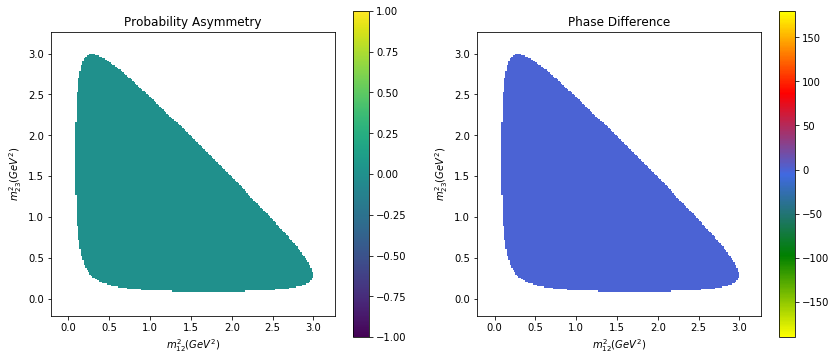

In [3]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,6))
axis1.set_title('Probability Asymmetry')
diff_prob = (dist_prob_bar-dist_prob)/(dist_prob_bar+dist_prob) # definition of asymmetry
diff_phase = dist_phase_bar-dist_phase
for m in range(npoints):
    for n in range(npoints):
        ### probability asymmetry
        if dist_prob[m,n]==-10:
            diff_prob[m,n] = -2
        ### phase difference
        if diff_phase[m,n]<-370:
            diff_phase[m,n] = -200
        elif diff_phase[m,n]<-180:
            diff_phase[m,n]+=360
        elif diff_phase[m,n]>180:
            diff_phase[m,n]-=360

            
### display probability asymmetry
my_cmap3 = matplotlib.cm.get_cmap('viridis') # for asymmetry plot
my_cmap3.set_under('w')
clnorm3 = plt.Normalize(-1.0,1.0) 
im1 = axis1.imshow(diff_prob,origin='lower',extent=[xmin-margin,xmin-margin+side,ymin-margin,ymin-margin+side],cmap=my_cmap3,norm=clnorm3,vmin=-1.)
axis1.set_xlabel('$m_{12}^2(GeV^2)$')
axis1.set_ylabel('$m_{23}^2(GeV^2)$')
fig.colorbar(im1,ax=axis1)
axis2.set_title('Phase Difference')

### display phase difference
im2 = axis2.imshow(diff_phase,origin='lower',extent=[xmin-margin,xmin-margin+side,ymin-margin,ymin-margin+side],cmap=my_cmap2,norm=clnorm2,vmin=-190)
axis2.set_xlabel('$m_{12}^2(GeV^2)$')
axis2.set_ylabel('$m_{23}^2(GeV^2)$')
fig.colorbar(im2,ax=axis2)
plt.show()

## Probability projections on the three axes of the meson Dalitz plot

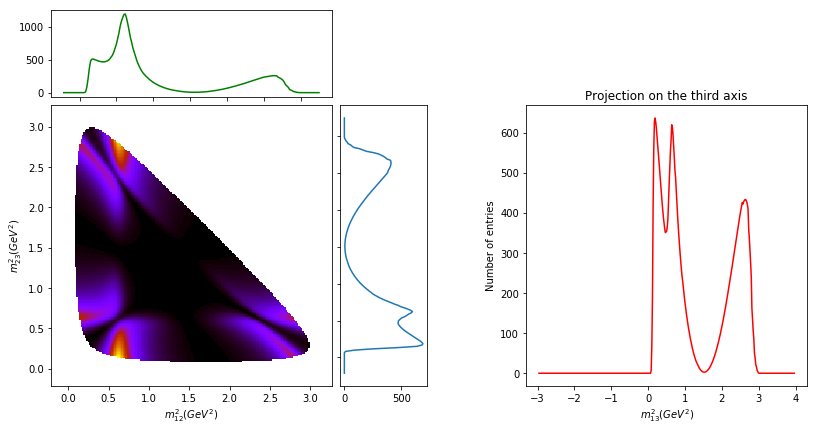

In [4]:
### projection plots
cx = np.array([nindex2value(i,side,xmin,margin) for i in arr])
cy = np.array([nindex2value(i,side,ymin,margin) for i in arr])
cz = np.linspace(msum-cx[npoints-1]-cy[npoints-1],msum-cx[0]-cy[0],2*npoints-1)

### calculate projections
xproj = np.zeros(npoints)
yproj = np.zeros(npoints)
zproj = np.zeros(2*npoints-1)
for m in range(npoints):
    for n in range(npoints):
        if (dist_prob[n,m]>0):
            xproj[m]+=dist_prob[n,m]
            yproj[n]+=dist_prob[n,m]
            zproj[2*npoints-2-m-n]+=dist_prob[n,m]

### structure of subplots           
from matplotlib.ticker import NullFormatter
nullfmt = NullFormatter() # no labels

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
#fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,6))
plt.figure(1, figsize=(6, 6))

axScatter = plt.axes(rect_scatter) # the positions of the three subfigures
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# imshow of dist_prob
axScatter.imshow(dist_prob,origin='lower',extent=[xmin-margin,xmin-margin+side,ymin-margin,ymin-margin+side],cmap=my_cmap1,vmin=0)
# projection on x and y
axHistx.plot(cx,xproj,'g')
axHisty.plot(yproj,cy)
axScatter.set_xlabel('$m_{12}^2(GeV^2)$')
axScatter.set_ylabel('$m_{23}^2(GeV^2)$')
# projection on z
rect_histz = [1.2, 0.1, 0.65, 0.65]
axHistz = plt.axes(rect_histz)
axHistz.plot(cz,zproj,'r')
axHistz.set_xlabel('$m_{13}^2(GeV^2)$')
axHistz.set_ylabel('Number of entries')
axHistz.set_title('Projection on the third axis')

plt.show()

## Display of meson Dalitz plot with logarithmic density scale

you can change the lowerlimit from -10 to 0 inside the codes. Here the lowerlimit is -2.0


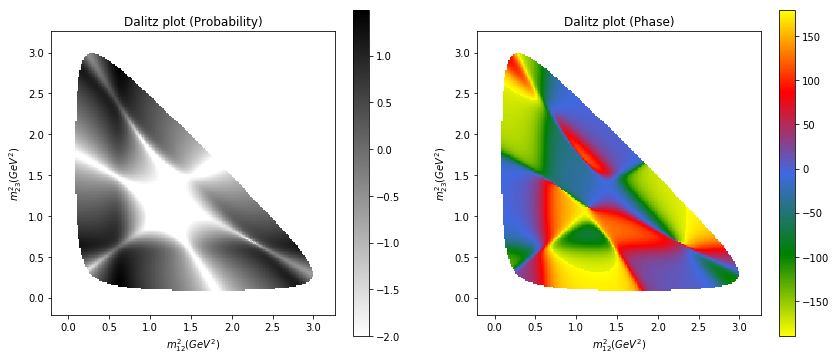

In [22]:
### transform probability of the first Dalitz into log(proba)
dist_prob_log = np.zeros([npoints,npoints])
for m in range(npoints):
    for n in range(npoints):
        if dist_prob[m,n]>0:
            dist_prob_log[m,n] = np.log10(dist_prob[m,n])
        else:
            dist_prob_log[m,n] = -11

### definition of cmap
my_cmap_log = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","black"])
my_cmap_log.set_under('w')
#clnorm_log = plt.Normalize(vmin=-5, vmax=5)

### Dalitz plot (log(proba) and phase stays the same)

lowerlimit = -2 # This means proba under e^lowerlimit will just be seen as 0 and plotted to be white
print("you can change the lowerlimit from -10 to 0 inside the codes. Here the lowerlimit is %.1f" % lowerlimit)

fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,6))
axis1.set_title('Dalitz plot (Probability)')
im1 = axis1.imshow(dist_prob_log,origin='lower',extent=[xmin-margin,xmin-margin+side,ymin-margin,ymin-margin+side],cmap=my_cmap_log,vmin=lowerlimit)
axis1.set_xlabel('$m_{12}^2(GeV^2)$')
axis1.set_ylabel('$m_{23}^2(GeV^2)$')
fig.colorbar(im1,ax=axis1)
axis2.set_title('Dalitz plot (Phase)')
im2 = axis2.imshow(dist_phase,origin='lower',extent=[xmin-margin,xmin-margin+side,ymin-margin,ymin-margin+side],cmap=my_cmap2,norm=clnorm2,vmin=-190)
axis2.set_xlabel('$m_{12}^2(GeV^2)$')
axis2.set_ylabel('$m_{23}^2(GeV^2)$')
fig.colorbar(im2,ax=axis2)
plt.show()

## Illustration of summation of amplitudes in the complex plane

This illustrates how the individual amplitudes add up as complex numbers for a specific point in the Dalitz plot.
Enter x y: 1 1
Legend: black: non-resonant, blue: x,  green: y,  magenta: z, red star: sum


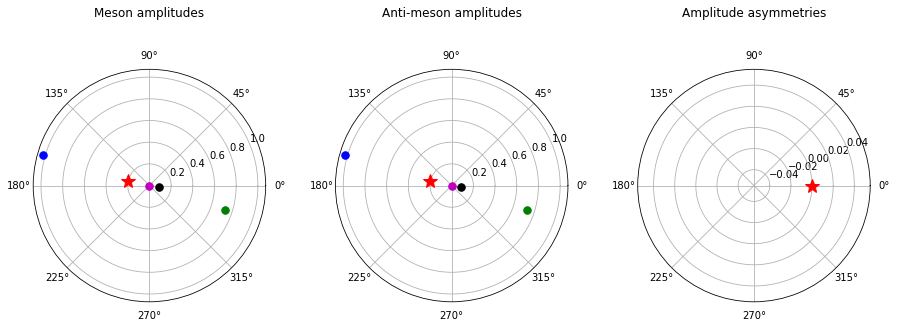

In [19]:
### input coordinate (x,y)
print('This illustrates how the individual amplitudes add up as complex numbers for a specific point in the Dalitz plot.')
xcoord, ycoord = input("Enter x y: ").split()
m = value2index(float(xcoord),margin,xmin,side)
n = value2index(float(ycoord),margin,ymin,side)
print("Legend: black: non-resonant, blue: x,  green: y,  magenta: z, red star: sum")


figcom, (axcom1, axcom2, axcom3) = plt.subplots(1,3,figsize=(15,5))
msize = 15

### for the first Dalitz
axcom1 = plt.subplot(1, 3, 1, projection='polar')
apd = dist_amplitude[n,m]
plt.polar(cmath.phase(apd),abs(apd),'r*',markersize=msize)
apd = dist_a1[n,m]
plt.polar(cmath.phase(apd),abs(apd),'k.',markersize=msize)
apd = dist_ax[n,m]
plt.polar(cmath.phase(apd),abs(apd),'b.',markersize=msize)
apd = dist_ay[n,m]
plt.polar(cmath.phase(apd),abs(apd),'g.',markersize=msize)
apd = dist_az[n,m]
plt.polar(cmath.phase(apd),abs(apd),'m.',markersize=msize)

### for the second Dalitz
axcom2 = plt.subplot(1, 3, 2, projection='polar')
apd = dist_amplitude_bar[n,m]
plt.polar(cmath.phase(apd),abs(apd),'r*',markersize=msize)
apd = dist_a1_bar[n,m]
plt.polar(cmath.phase(apd),abs(apd),'k.',markersize=msize)
apd = dist_ax_bar[n,m]
plt.polar(cmath.phase(apd),abs(apd),'b.',markersize=msize)
apd = dist_ay_bar[n,m]
plt.polar(cmath.phase(apd),abs(apd),'g.',markersize=msize)
apd = dist_az_bar[n,m]
plt.polar(cmath.phase(apd),abs(apd),'m.',markersize=msize)

### the difference of their total amplitude
axcom3 = plt.subplot(1, 3, 3, projection='polar')
apd = dist_amplitude_bar[n,m]-dist_amplitude[n,m]
plt.polar(cmath.phase(apd),abs(apd),'r*',markersize=msize)

### add titles
axcom1.set_title('Meson amplitudes',y=1.2)
axcom2.set_title('Anti-meson amplitudes',y=1.2)
axcom3.set_title('Amplitude asymmetries',y=1.2)

plt.subplots_adjust(wspace=0.3)
plt.show()